In [1]:
import numpy as np
import pandas as pd

In [2]:
import glob

folder = "datasets/"
files = glob.glob(folder + "*.txt")
files.sort()
files

['datasets\\Autobiography.txt',
 'datasets\\CoralReefs.txt',
 'datasets\\DescentofMan.txt',
 'datasets\\DifferentFormsofFlowers.txt',
 'datasets\\EffectsCrossSelfFertilization.txt',
 'datasets\\ExpressionofEmotionManAnimals.txt',
 'datasets\\FormationVegetableMould.txt',
 'datasets\\FoundationsOriginofSpecies.txt',
 'datasets\\GeologicalObservationsSouthAmerica.txt',
 'datasets\\InsectivorousPlants.txt',
 'datasets\\LifeandLettersVol1.txt',
 'datasets\\LifeandLettersVol2.txt',
 'datasets\\MonographCirripedia.txt',
 'datasets\\MonographCirripediaVol2.txt',
 'datasets\\MovementClimbingPlants.txt',
 'datasets\\OriginofSpecies.txt',
 'datasets\\PowerMovementPlants.txt',
 'datasets\\VariationPlantsAnimalsDomestication.txt',
 'datasets\\VolcanicIslands.txt',
 'datasets\\VoyageBeagle.txt']

### Loading the contents of each book into

In [3]:
import re, os


txts = []
titles = []

for n in files:
    # Open each file
    f = open(n, encoding='utf-8-sig')
    # Remove all non-alpha-numeric characters
    data = re.sub('[\W]+', ' ', f.read())

    # Store the texts and titles of the books in two separate lists
    txts.append(data)
    titles.append(os.path.basename(n).replace(".txt", ""))


###  Find "Descent of Man"

In [4]:
for i in range(len(titles)):
    # Store the index if the title is "DescentofMan"
    if titles[i]=="DescentofMan":
        dom = i

print(dom)

2


### Tokenize the corpus

In [5]:
from nltk.corpus import stopwords


In [6]:
# a list of stop words
stoplist = set(stopwords.words('english'))

# Convert the text to lower case 
txts_lower_case = [txt.lower() for txt in txts]

# Transform the text into tokens 
txts_split = [txt.split() for txt in txts_lower_case]

# Remove tokens which are part of the list of stop words
texts = [[word for word in txt if word not in stoplist] for txt in txts_split]

# Print the first 20 tokens for the "Descent of Man" book
texts[dom][0:20]


['descent',
 'man',
 'selection',
 'relation',
 'sex',
 'works',
 'charles',
 'darwin',
 'f',
 'r',
 'life',
 'letters',
 'charles',
 'darwin',
 'autobiographical',
 'chapter',
 'edited',
 'francis',
 'darwin',
 'portraits']

### Stemming the tokenized corpus

In [7]:
from nltk.stem import PorterStemmer

# Create an instance of a PorterStemmer object
porter = PorterStemmer()

# For each token of each text, we generated its stem 
texts_stem = [[porter.stem(token) for token in text] for text in texts]

In [8]:
texts_stem[dom][0:20]

['descent',
 'man',
 'select',
 'relat',
 'sex',
 'work',
 'charl',
 'darwin',
 'f',
 'r',
 'life',
 'letter',
 'charl',
 'darwin',
 'autobiograph',
 'chapter',
 'edit',
 'franci',
 'darwin',
 'portrait']

### Building a bag-of-words model

In [9]:
from gensim import corpora

# Create a dictionary from the stemmed tokens
dictionary = corpora.Dictionary(texts_stem)

# Create a bag-of-words model for each book, using the previously generated dictionary
bows = [dictionary.doc2bow(text) for text in texts_stem]

The most common words of a given book

In [10]:

# Convert the BoW model for "Descent of Man" into a DataFrame
df_bow_dom = pd.DataFrame(bows[dom])

# Add the column names to the DataFrame
df_bow_dom.columns = ["index", "occurrences"]

# Add a column containing the token corresponding to the dictionary index
df_bow_dom["token"] = [dictionary[index] for index in df_bow_dom["index"]]

# Sort the DataFrame by descending number of occurrences and print the first 10 values
df_bow_dom.sort_values(by="occurrences", ascending=False).head(10)

,index,occurrences,token
1142,1481,2867,male
5931,7825,2135,femal
361,494,1445,colour
514,682,1407,differ
1651,2125,1326,sex
1327,1718,1324,p
1144,1484,1218,man
244,312,1103,bird
1730,2224,1100,speci
1298,1685,999,one


### Build a tf-idf model

In [11]:
from gensim.models import TfidfModel

# Generate the tf-idf model
model = TfidfModel(bows)


### The results of the tf-idf model

In [12]:
df_tfidf = pd.DataFrame(model[bows[dom]])
df_tfidf.columns = ["id","score"]

# Add the tokens corresponding to the numerical indices for better readability
df_tfidf['token'] = [dictionary[i] for i in list(df_tfidf["id"])]

# The first 10 rows of the DataFrame by descending tf-idf score
df_tfidf.sort_values(by="score", ascending=False).head(10)


,id,score,token
5332,7825,0.479839,femal
816,1481,0.449909,male
8347,10840,0.220112,shew
1174,2125,0.167834,sex
7593,10086,0.147805,plumag
1175,2126,0.144992,sexual
8348,10841,0.144869,shewn
8629,11122,0.116020,stridul
1162,2103,0.110006,select
69,123,0.104414,adult


### Computing similarity

In [13]:
from gensim import similarities

# Compute the similarity matrix (pairwise distance between all texts)
sims = similarities.MatrixSimilarity(model[bows])
    
# Transform the resulting list into a dataframe
sim_df = pd.DataFrame(list(sims))


sim_df.columns = titles
sim_df.index = titles

# Print the resulting matrix
sim_df.head()

,Autobiography,CoralReefs,DescentofMan,DifferentFormsofFlowers,EffectsCrossSelfFertilization,ExpressionofEmotionManAnimals,FormationVegetableMould,FoundationsOriginofSpecies,GeologicalObservationsSouthAmerica,InsectivorousPlants,LifeandLettersVol1,LifeandLettersVol2,MonographCirripedia,MonographCirripediaVol2,MovementClimbingPlants,OriginofSpecies,PowerMovementPlants,VariationPlantsAnimalsDomestication,VolcanicIslands,VoyageBeagle
Autobiography,1.000000,0.049237,0.080235,0.066347,0.077055,0.087831,0.040685,0.026525,0.030250,0.014838,0.534997,0.292161,0.005506,0.006673,0.022851,0.098686,0.016115,0.043821,0.038230,0.181494
CoralReefs,0.049237,1.000000,0.009462,0.001949,0.001924,0.004971,0.029394,0.010097,0.060775,0.002252,0.044122,0.026313,0.005934,0.008951,0.001517,0.038707,0.002670,0.010329,0.057369,0.267450
DescentofMan,0.080235,0.009462,1.000000,0.072472,0.029918,0.146462,0.027027,0.061512,0.009592,0.009399,0.086791,0.130198,0.051466,0.036483,0.005130,0.263388,0.011199,0.207145,0.007832,0.123499
DifferentFormsofFlowers,0.066347,0.001949,0.072472,1.000000,0.391408,0.006500,0.010569,0.017557,0.002867,0.007458,0.023960,0.076875,0.008920,0.004451,0.008211,0.126853,0.018835,0.044339,0.002601,0.013100
EffectsCrossSelfFertilization,0.077055,0.001924,0.029918,0.391408,1.000000,0.006832,0.032246,0.016768,0.002239,0.006753,0.029386,0.076840,0.003002,0.002354,0.015048,0.144082,0.039789,0.048506,0.002171,0.017180


### 11. The book most similar to "Descent of Man"

Text(0.5, 1.0, "Most similar books to 'On the Origin of Species'")

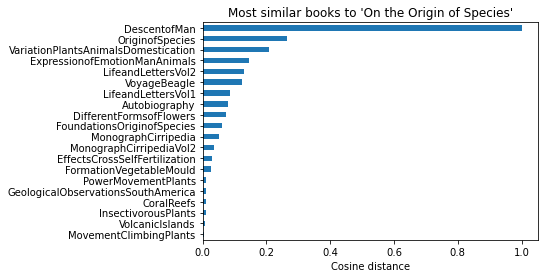

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

# The column corresponding to "Descent of Man"  
v =  sim_df["DescentofMan"]

# Sort by ascending scores
v_sorted = v.sort_values(ascending=True)


v_sorted.plot.barh(x='lab', y='val', rot=0).plot()

# Modify the axes labels and plot title for better readability
plt.xlabel("Cosine distance")
plt.ylabel("")
plt.title("Most similar books to 'On the Origin of Species'")

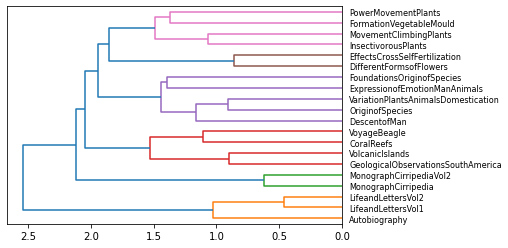

In [15]:

from scipy.cluster import hierarchy

# Compute the clusters from the similarity matrix,
# using the Ward variance minimization algorithm
Z = hierarchy.linkage(sim_df, 'ward')

# Display this result as a horizontal dendrogram
cluster = hierarchy.dendrogram(Z,  leaf_font_size=8, labels=sim_df.index,  orientation="left")